In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pendapatan.csv')
df.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,0,RUPIAH,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,27946638075,RUPIAH,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,7077430815,RUPIAH,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,485255100,RUPIAH,2014
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,0,RUPIAH,2014
5,6,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RESTORAN/RUMAH MAKAN,0,RUPIAH,2014
6,7,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HIBURAN,0,RUPIAH,2014
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RETRIBUSI,1108916000,RUPIAH,2014
8,9,32,JAWA BARAT,3203,KABUPATEN CIANJUR,HOTEL,4337767572,RUPIAH,2014
9,10,32,JAWA BARAT,3203,KABUPATEN CIANJUR,RESTORAN/RUMAH MAKAN,2490761962,RUPIAH,2014


In [3]:
df.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
sektor_wisata          0
jumlah_pendapatan      0
satuan                 0
tahun                  0
dtype: int64

In [4]:
df.shape

(969, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   969 non-null    int64 
 1   kode_provinsi        969 non-null    int64 
 2   nama_provinsi        969 non-null    object
 3   kode_kabupaten_kota  969 non-null    int64 
 4   nama_kabupaten_kota  969 non-null    object
 5   sektor_wisata        969 non-null    object
 6   jumlah_pendapatan    969 non-null    int64 
 7   satuan               969 non-null    object
 8   tahun                969 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 68.3+ KB


In [6]:
missing_values = df.isnull().sum()
print("Jumlah Missing Values di Setiap Kolom")
print(missing_values)

Jumlah Missing Values di Setiap Kolom
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
sektor_wisata          0
jumlah_pendapatan      0
satuan                 0
tahun                  0
dtype: int64


In [7]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

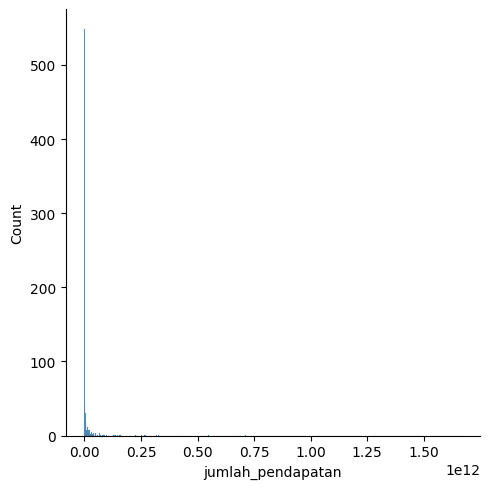

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.displot(df["jumlah_pendapatan"])
plt.show

In [9]:
df.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_pendapatan,tahun
count,969.000000,969.0,969.000000,9.690000e+02,969.000000
mean,485.000000,32.0,3231.429309,1.743614e+10,2018.018576
std,279.870506,0.0,31.280347,7.655250e+10,2.575245
min,1.000000,32.0,3201.000000,0.000000e+00,2014.000000
25%,243.000000,32.0,3207.000000,0.000000e+00,2016.000000
50%,485.000000,32.0,3214.000000,7.063139e+08,2018.000000
75%,727.000000,32.0,3273.000000,6.395718e+09,2020.000000
max,969.000000,32.0,3279.000000,1.665645e+12,2022.000000


<function matplotlib.pyplot.show(close=None, block=None)>

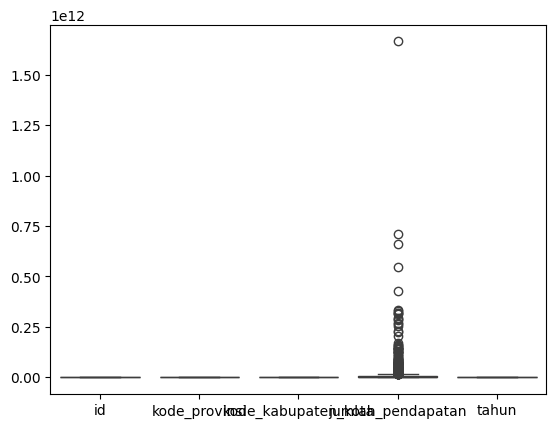

In [10]:
sns.boxplot(data=df)
plt.show

In [11]:
print(df.columns)

Index(['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota',
       'nama_kabupaten_kota', 'sektor_wisata', 'jumlah_pendapatan', 'satuan',
       'tahun'],
      dtype='object')


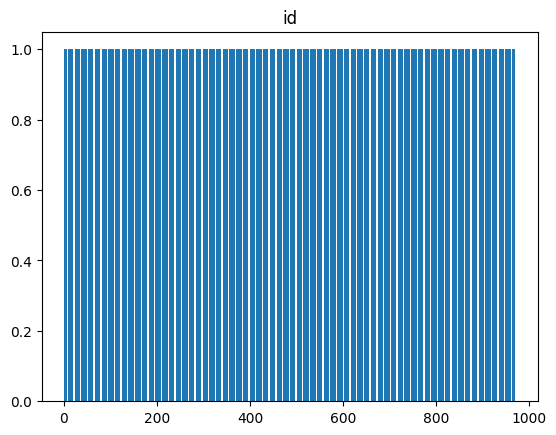

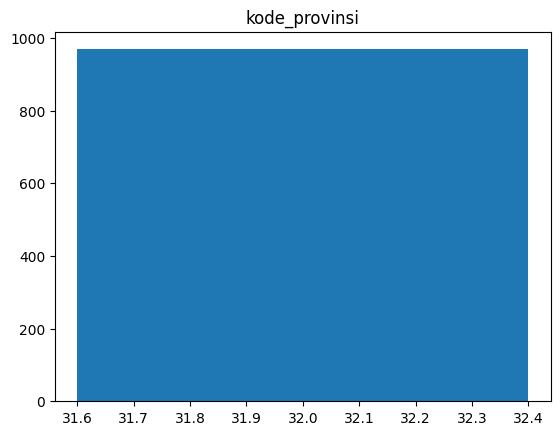

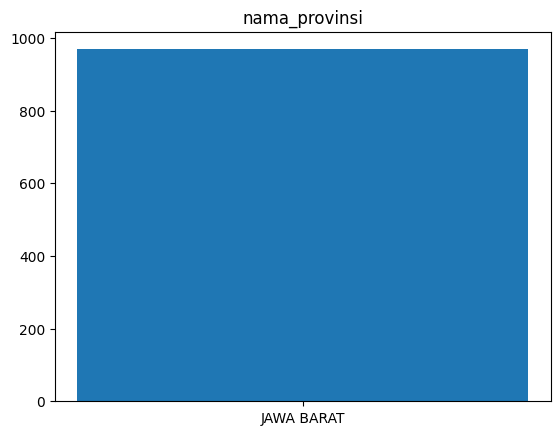

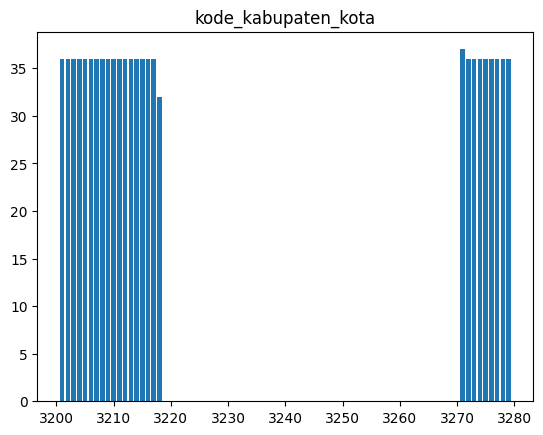

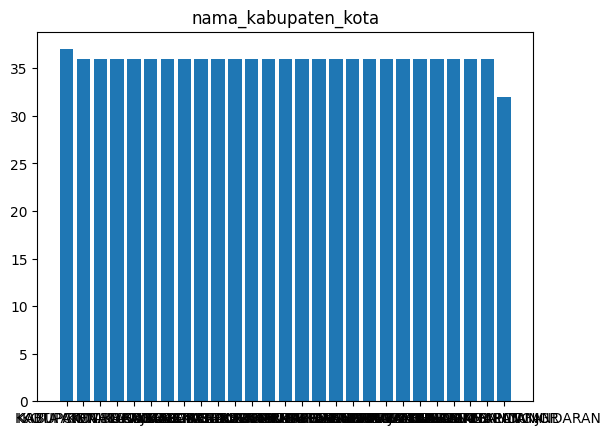

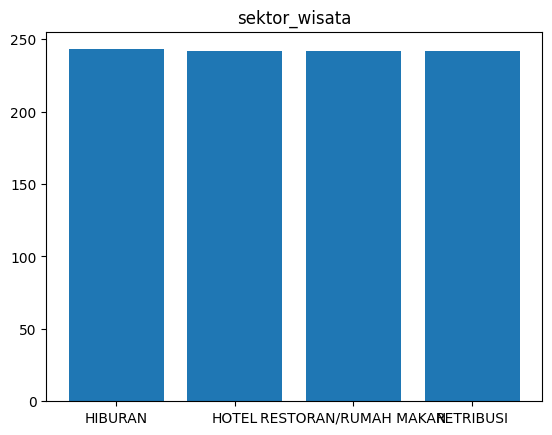

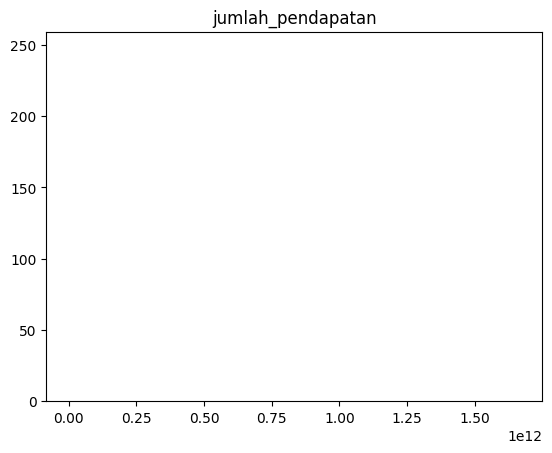

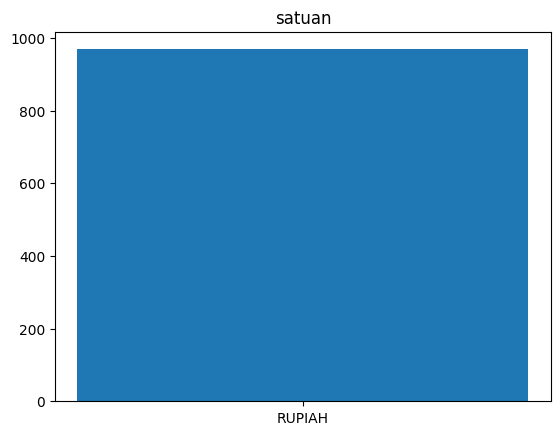

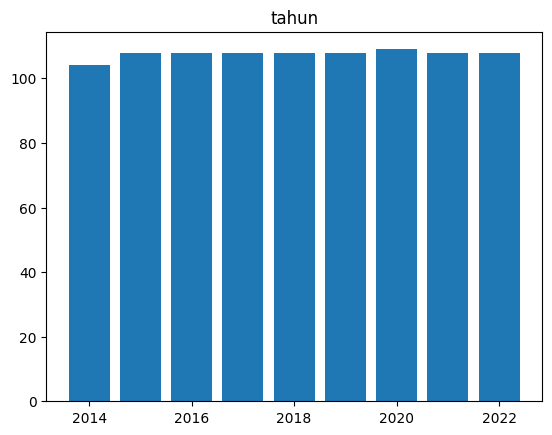

In [12]:
for i in df.columns:
    plt.bar(df[i].value_counts().index, df[i].value_counts())
    plt.title(i)
    plt.show()

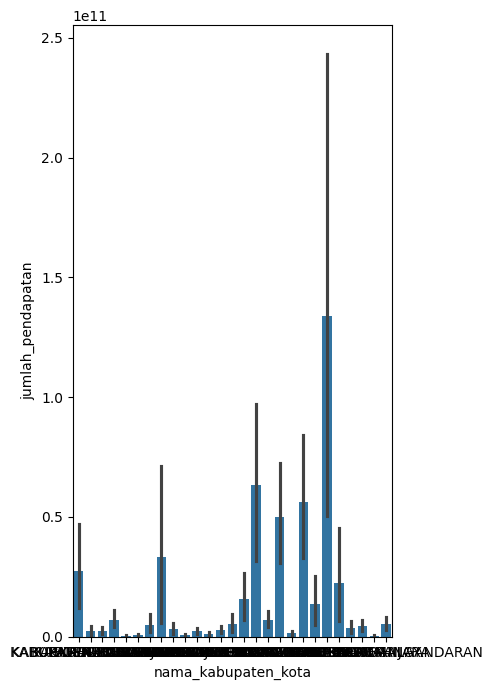

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, figsize=(5,7))

sns.barplot(x='nama_kabupaten_kota', y='jumlah_pendapatan', data=df, ax=axes)

plt.tight_layout()
plt.show()

K-MEANS

In [14]:
num_clusters = 3

In [15]:
selected_columns = ['jumlah_pendapatan', 'tahun']
X = df[selected_columns]

In [16]:
df.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,0,RUPIAH,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,27946638075,RUPIAH,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,7077430815,RUPIAH,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,485255100,RUPIAH,2014
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,0,RUPIAH,2014
5,6,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RESTORAN/RUMAH MAKAN,0,RUPIAH,2014
6,7,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HIBURAN,0,RUPIAH,2014
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RETRIBUSI,1108916000,RUPIAH,2014
8,9,32,JAWA BARAT,3203,KABUPATEN CIANJUR,HOTEL,4337767572,RUPIAH,2014
9,10,32,JAWA BARAT,3203,KABUPATEN CIANJUR,RESTORAN/RUMAH MAKAN,2490761962,RUPIAH,2014


In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['jumlah_pendapatan']])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
df.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun,cluster
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,0,RUPIAH,2014,0
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,27946638075,RUPIAH,2014,0
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,7077430815,RUPIAH,2014,0
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,485255100,RUPIAH,2014,0
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,0,RUPIAH,2014,0
5,6,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RESTORAN/RUMAH MAKAN,0,RUPIAH,2014,0
6,7,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HIBURAN,0,RUPIAH,2014,0
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RETRIBUSI,1108916000,RUPIAH,2014,0
8,9,32,JAWA BARAT,3203,KABUPATEN CIANJUR,HOTEL,4337767572,RUPIAH,2014,0
9,10,32,JAWA BARAT,3203,KABUPATEN CIANJUR,RESTORAN/RUMAH MAKAN,2490761962,RUPIAH,2014,0


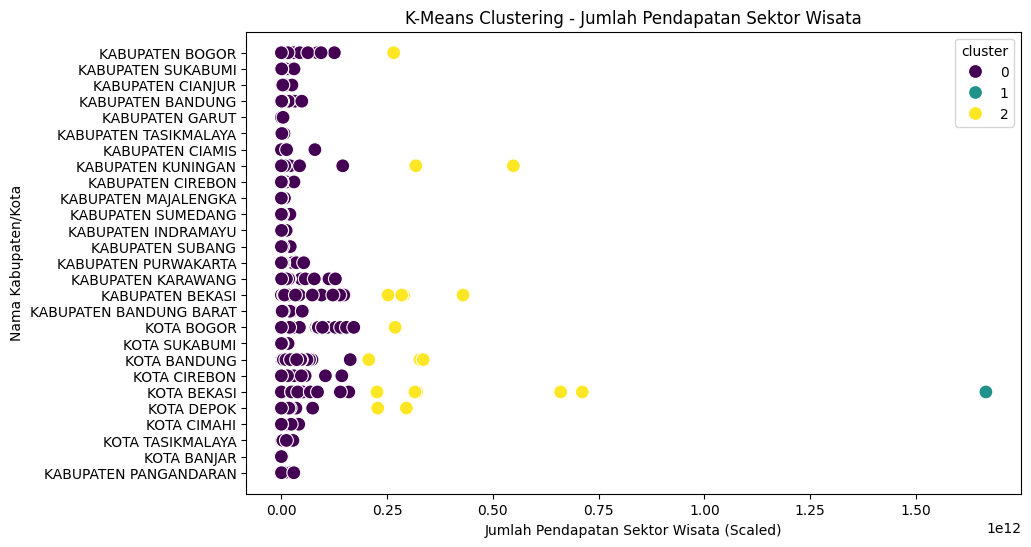

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='jumlah_pendapatan', y='nama_kabupaten_kota', hue='cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering - Jumlah Pendapatan Sektor Wisata')
plt.xlabel('Jumlah Pendapatan Sektor Wisata (Scaled)')
plt.ylabel('Nama Kabupaten/Kota')
plt.show()

In [121]:
max_productivity_rows = df.loc[df.groupby('tahun')['jumlah_pendapatan'].idxmax()]
print("Kabupaten/Kota dengan Jumlah Pendapatan Bidang Wisata Terbanyak Setiap Tahun:")
print(max_productivity_rows[['tahun', 'nama_kabupaten_kota', 'jumlah_pendapatan']])

Kabupaten/Kota dengan Jumlah Pendapatan Bidang Wisata Terbanyak Setiap Tahun:
     tahun nama_kabupaten_kota  jumlah_pendapatan
1     2014     KABUPATEN BOGOR           1.973773
105   2015     KABUPATEN BOGOR           1.973773
213   2016     KABUPATEN BOGOR           1.973773
320   2017     KABUPATEN BOGOR           1.973773
441   2018   KABUPATEN BANDUNG           1.973773
549   2019   KABUPATEN BANDUNG           1.973773
657   2020   KABUPATEN BANDUNG           1.973773
753   2021     KABUPATEN BOGOR           1.973773
861   2022     KABUPATEN BOGOR           1.973773


HIERARCHICAL CLUSTERING

In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   969 non-null    int64  
 1   kode_provinsi        969 non-null    int64  
 2   nama_provinsi        969 non-null    object 
 3   kode_kabupaten_kota  969 non-null    int64  
 4   nama_kabupaten_kota  969 non-null    object 
 5   sektor_wisata        969 non-null    object 
 6   jumlah_pendapatan    969 non-null    float64
 7   satuan               969 non-null    object 
 8   tahun                969 non-null    int64  
 9   cluster              969 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 72.0+ KB


In [116]:
df.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
sektor_wisata          0
jumlah_pendapatan      0
satuan                 0
tahun                  0
cluster                0
dtype: int64

In [117]:
features = df[['kode_provinsi', 'kode_kabupaten_kota', 'tahun', 'jumlah_pendapatan']]

In [118]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [123]:
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
df['cluster'] = hc.fit_predict(df[['jumlah_pendapatan', 'tahun']])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [125]:
df.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun,cluster
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,-0.692799,RUPIAH,2014,1
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,1.973773,RUPIAH,2014,1
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,0.487521,RUPIAH,2014,1
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,-0.611872,RUPIAH,2014,1
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,-0.692799,RUPIAH,2014,1
5,6,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RESTORAN/RUMAH MAKAN,-0.692799,RUPIAH,2014,1
6,7,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HIBURAN,-0.692799,RUPIAH,2014,1
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RETRIBUSI,-0.507862,RUPIAH,2014,1
8,9,32,JAWA BARAT,3203,KABUPATEN CIANJUR,HOTEL,0.030621,RUPIAH,2014,1
9,10,32,JAWA BARAT,3203,KABUPATEN CIANJUR,RESTORAN/RUMAH MAKAN,-0.277408,RUPIAH,2014,1


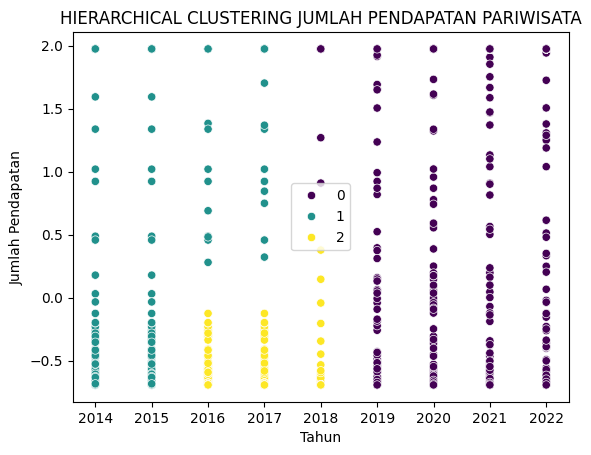

In [126]:
sns.scatterplot(x='tahun', y='jumlah_pendapatan', hue='cluster', data=df, palette='viridis')
plt.title('HIERARCHICAL CLUSTERING JUMLAH PENDAPATAN PARIWISATA')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pendapatan')
plt.legend()
plt.show()

DBSCAN

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   969 non-null    int64  
 1   kode_provinsi        969 non-null    int64  
 2   nama_provinsi        969 non-null    object 
 3   kode_kabupaten_kota  969 non-null    int64  
 4   nama_kabupaten_kota  969 non-null    object 
 5   sektor_wisata        969 non-null    object 
 6   jumlah_pendapatan    969 non-null    float64
 7   satuan               969 non-null    object 
 8   tahun                969 non-null    int64  
 9   cluster              969 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 75.8+ KB


In [128]:
df.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
sektor_wisata          0
jumlah_pendapatan      0
satuan                 0
tahun                  0
cluster                0
dtype: int64

In [129]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(df[['jumlah_pendapatan']])

In [130]:
df.head(10)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,sektor_wisata,jumlah_pendapatan,satuan,tahun,cluster
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HOTEL,-0.692799,RUPIAH,2014,0
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RESTORAN/RUMAH MAKAN,1.973773,RUPIAH,2014,0
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIBURAN,0.487521,RUPIAH,2014,0
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,RETRIBUSI,-0.611872,RUPIAH,2014,0
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HOTEL,-0.692799,RUPIAH,2014,0
5,6,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RESTORAN/RUMAH MAKAN,-0.692799,RUPIAH,2014,0
6,7,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HIBURAN,-0.692799,RUPIAH,2014,0
7,8,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,RETRIBUSI,-0.507862,RUPIAH,2014,0
8,9,32,JAWA BARAT,3203,KABUPATEN CIANJUR,HOTEL,0.030621,RUPIAH,2014,0
9,10,32,JAWA BARAT,3203,KABUPATEN CIANJUR,RESTORAN/RUMAH MAKAN,-0.277408,RUPIAH,2014,0


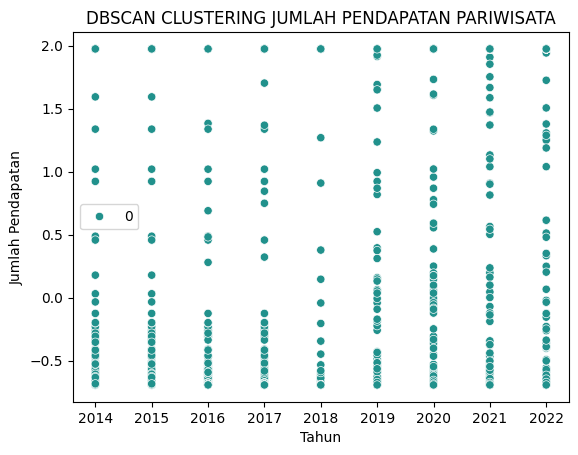

In [131]:
sns.scatterplot(x='tahun', y='jumlah_pendapatan', hue='cluster', data=df, palette='viridis')
plt.title('DBSCAN CLUSTERING JUMLAH PENDAPATAN PARIWISATA')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pendapatan')
plt.legend()
plt.show()